# Flujo monofásico en 2D


### Objetivo:
  


### Contenido:
1. Resuelución de un problema de ingeniería mediante matemática computacional
2. Condiciones de frontera
   1. Primera clase (Newman)
   2. Segunda clase (Dirichlet)
3. Resolución del problema para flujo monofasico en 2D
   1. Algoritmo de Thomas
   2. Implementación de SciPy

<img src="images/portada.jpg" width="400px" height="auto" />


## 1. Resolución de un problema de ingenieria mediante matematica computacional 
Se realiza la siguiente metodologia:
1. Definir un modelo físico conceptual
2. Definir el modelo matemático
3. Definir el modelo numérico
4. Definir el modelo computacional (algoritmo de solución)

### 1.1 Modelo físico conceptual

Se inyecta un fluido a presión constante (**1,000 psi**) y se produce a presión constante (**500 psi**), en un medio poroso bidimensional homogéneo (de longitud Lx = **1,000 ft** y Ly = **500 ft** con permeabilidad y porosidad constantes), así mismo las propiedades del fluido no dependen de la presión, adicionalmente el medio poroso se encuentra saturado completamente de este fluido, por lo que se desea conocer el gradiente de presión en estado permanente.

1. No se consideran los efectos de la fuerza de gravedad
2. No hay fuentes ni sumideros
3. El fluido es incompresible y la viscosidad constante
4. El medio está inicialmente saturado del fluido
5. Ya se ha llegado al estado estable o permanente
6. Las permeabilidades en dirección $x$ y $y$ son iguales e invariantes en el espacio y tiempo 

Partiendo de la ecuacion general de balance de materia para flujo monofásico (de cualquier fluido $\alpha$) en medios porosos se tiene:

$$\frac{\partial \phi\rho_\alpha}{\partial t} - \nabla (\rho_\alpha \frac{k}{\mu}(\nabla\rho_\alpha - \rho_\alpha \delta\nabla z)) = q_\alpha$$

### 1.2 y 1.3 Modelo matemático y numérico
Tomando en cuenta las consideraciones del modelo físico se llega a:
$$\frac{\partial^2 \rho_\alpha}{\partial x^2} + \frac{\partial^2 \rho_\alpha}{\partial y^2} = 0$$

Discretizando la ecuacion anterior en una malla bidimensional se llega a:

$$AP_{i,j}p_i = AE_{i,j}p_{i+1, j}+ AW_{i,j}p_{i-1, j} + AN_{i,j}p_{i,j+1} + AS_{i,j}p_{i-1, j} + B_{i,j}$$

$$i = 1,2,3,4,...,nx-2$$
$$j = 1,2,3,4,...,ny-2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import funciones_personalizadas as fp

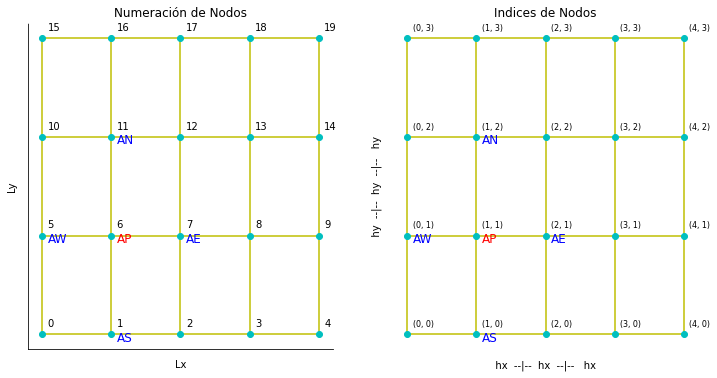

Nodo discretizado: 


(1, 1)

In [2]:
# Considere una malla rectangular de 1,000 ft x 500 ft, en el eje x e y, respectivamente. Con 5 nodos en x y 4 en y.

nodos_x, nodos_y = 5, 4
longitud_x, longitud_y = 1000, 500
nx_a_discretizar, ny_a_discretizar = 1,1

fp.discretizacion_en_malla_rectangular(longitud_x, longitud_y, nodos_y, nodos_x, nx_a_discretizar, ny_a_discretizar)

In [3]:
nodos_x, nodos_y = 5, 4
nodo_a_discretizar = 1

fp.generar_matriz(nodos_x, nodos_y, nodo_a_discretizar)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,AP,AE,0,0,0,AN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AW,AP,AE,0,0,0,AN,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,AW,AP,AE,0,0,0,AN,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,AW,AP,AE,0,0,0,AN,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,AW,AP,0,0,0,0,AN,0,0,0,0,0,0,0,0,0,0
5,AS,0,0,0,0,AP,AE,0,0,0,AN,0,0,0,0,0,0,0,0,0
6,0,AS,0,0,0,AW,AP,AE,0,0,0,AN,0,0,0,0,0,0,0,0
7,0,0,AS,0,0,0,AW,AP,AE,0,0,0,AN,0,0,0,0,0,0,0
8,0,0,0,AS,0,0,0,AW,AP,AE,0,0,0,AN,0,0,0,0,0,0
9,0,0,0,0,AS,0,0,0,AW,AP,0,0,0,0,AN,0,0,0,0,0


### Discretización de las ecuaciones

Aplicando diferencias finitas centradas

$$\frac{\partial^2 \rho_\alpha}{\partial x^2}+ \frac{\partial^2\rho_\alpha}{\partial y^2} =
\frac{P_{i+1,j-1} - 2P_{i,j} + P_{i-1,j}}{hx^2}
+ \frac{P_{i,j+1} - 2P_{i,j} + P_{i,j-1}}{hy^2} = 0$$

Despejando $P_{i,j}$ (donde P es el valor incognita)

$$P_{i,j}(\frac{2}{hx^2} + \frac{2}{hy^2})  
= \frac{P_{i+1,j}}{hx^2} + \frac{P_{i-1,j}}{hx^2} + \frac{P_{i,j+1}}{hy^2} + \frac{P_{i,j-1}}{hy^2}
$$

La ecuación anterior se puede reescribir como:
$$AP P_{i,j} = AE P_{i+1,j} + AW P_{i-1,j} + AN P_{i,j+1}
+ AS P_{i,j-1} + B_{i,j}$$

$Donde:$

$AP = (\frac{2}{hx^2} + \frac{2}{hy^2})$,
$AE = \frac{1}{hx^2}$,
$AW = \frac{1}{hx^2}$,
$AN = \frac{1}{hy^2}$,
$AS = \frac{1}{hy^2}$,

In [4]:
def ecuaciones_discretizadas(lx, ly, nx, ny, hx, hy):
    """
    Esta funcion genera los coeficientes de la ecuacion de flujo monofasico discretizada. No se consideran las
    condiciones de frontera.
    Parametros
    ----------
    lx, ly : entero o flotante.
        Longitud en el eje x e y.
    nx, ny : int, int.
        Nodos en de la malla rectangular.
    Retorna
    -------
    AP,AE,AW,AN,AS,B : ndarray. 
        Arreglos en 2D para generar una matriz pentadiagonal.
    """
    
    # se definen los arreglos en dos dimensiones
    AP = np.zeros((nx,ny)) 
    AE = np.zeros((nx,ny))
    AW = np.zeros((nx,ny))
    AN = np.zeros((nx,ny))
    AS = np.zeros((nx,ny))
    B = np.zeros((nx,ny))
    
    """
    si se desea, se puede implementar un doble cliclo for
    para ello sustituya AX[:][:] por AX[i][j] y agrege la indentacion correpondiente.
    
    for j in range (1,ny-1):
        for i in range (1,nx-1):
            AX[i][j] = ...
    """
    
    AP[:][:]=2.0/hx**2.0+2.0/hy**2.0
    AE[:][:]=1.0/hx**2.0
    AW[:][:]=1.0/hx**2.0
    AN[:][:]=1.0/hy**2.0
    AS[:][:]=1.0/hy**2.0
    B[:][:]=0.0
    
    return AP,AE,AW,AN,AS,B

## 2. Codiciones de frontera
De acuerdo con la SEG Wiki, las condiciones de frontera se aplican en el término integral superficial de la Ecuación integral de un campo y consiste en valores prescritos de la solución y de las derivadas de la solución en la frontera. Cuando los valores de campo se especifican las condiciones se denominan **condiciones de Dirichlet**. Cuando se especifican las derivadas las condiciones se llaman **condiciones de Neumann**.


### 2.1 Primera clase o Dirichlet
Esta condición indica una funcion conocida que varia en el tiempo o un escalar dado (invariante en el tiempo) en las fronteras, es decir:

$$p_1=f(t,y) \quad o \quad p1=cte_1 = 1,000 psi$$
$$p_2=f(t,x) \quad o \quad p1=cte_2 = 500 psi$$
$$p_3=f(t,y) \quad o \quad p1=cte_3 = 500 psi$$
$$p_4=f(t,x) \quad o \quad p1=cte_4 = 500 psi$$

**Implementación:**
1. Identificar las fronteras y los puntos de la ecuacion discreta donde se implementará la condición
2. Llevar a cabo las sustituciones pertinenters en cada ecuación discreta, para este caso:

$$AP_{i,j}P_i = AE P_{i+1,j} + AW P_{i-1,j} + AN P_{i,j+1}
+ AS P_{i,j-1} + B_{i,j}$$

Considerando una malla con **nx = 5x** y **ny = 4**, se tiene la siguiente figura:
<img src="images/fronteras_fig.png" width="500px">

#### Para la frontera SUR:
Tomando en cuenta la figura anterior, se puede apreciar que no existe relacion con la presión $Sur (i,j-1)$, por lo tanto, la ecuación se reduce a:

$$AP_{i,j}p_{i} = AE P_{i+1,j} + AW P_{i-1,j} + AN P_{i,j+1}
+ B_{i,j}$$

En este caso el valor de presión está definido, por lo que el sistema de ecuaciones de reduce a:

$$AP_{i,j}P_i = B_i$$

$$para \quad i=0,1,2,3,4 \quad j=0$$
$$donde \quad AP_{i,j}=1 \quad y \quad B_{i,j}=Cte_2$$

*Todos los demás coeficientes se asignan a cero*

Para el resto de las fronteras se utiliza la misma lógica


In [5]:
def condiciones_de_frontera_dirichlet(P1, P2, P3, P4, AP, AW, AE, AN, AS, B):    
    for i in range (1,nx-1):
        AP[i][0]=1.0
        AW[i][0]=0.0    
        AE[i][0]=0.0      #Frontera sur
        AN[i][0]=0.0
        B[i][0]=P2
            
        AP[i][ny-1]=1.0
        AW[i][ny-1]=0.0    
        AE[i][ny-1]=0.0    #Frontera norte
        AS[i][ny-1]=1.0
        B[i][ny-1]=0.0

    #for j in range (0,ny):
    AP[0][:]=1.0
    AE[0][:]=0.0      #Frontera Oeste
    AN[0][:]=0.0
    AS[0][:]=0.0
    B[0][:]=P1
        
    AP[nx-1][:]=1.0
    AW[nx-1][:]=0.0
    AN[nx-1][:]=0.0   #Frontera Este
    AS[nx-1][:]=0.0
    B[nx-1][:]=P3

### 2.2 Fronteras de segunda clase Neumann (No flujo o frontera cerrada) 

$$p_1=f(t,y) \quad o \quad p1=cte_1 = 1,000 psi$$

$$ \frac{dp}{dy}\big|_{ 2} = f(t,x) \quad o \quad \frac{dp}{dy}\big|_{ 2} = 0.0$$

$$p_3=f(t,y) \quad o \quad p1=cte_3 = 500 psi$$

$$ \frac{dp}{dy}\big|_{ 4} = f(t,x) \quad o \quad \frac{dp}{dy}\big|_{ 4} = 0.0$$

In [6]:
def condiciones_de_frontera_newmann(x, P2, P4, AP, AW, AE, AN, AS, B):
    for i in range (1,nodos_x-1):
        AP[i][0]=1.0
        AW[i][0]=0.0    
        AE[i][0]=0.0      #Frontera sur
        AN[i][0]=1.0
        B[i][0]=0

        if ((x[i]>100)and(x[i]<200)):
            AP[i][0]=1.0
            AW[i][0]=0.0    
            AE[i][0]=0.0      #Frontera sur
            AN[i][0]=0.0
            B[i][0]=P2
        
        #AP[i][ny-1]=1.0
        #AW[i][ny-1]=0.0    
        #AE[i][ny-1]=0.0    #Frontera norte
        #AS[i][ny-1]=1.0
        #B[i][ny-1]=0.0

        AP[i][ny-1]=1.0
        AW[i][ny-1]=0.0    
        AE[i][ny-1]=0.0    #Frontera norte
        AS[i][ny-1]=0.0
        B[i][ny-1]=P4

## 3. Resolución del problema para flujo monofasico en 2D

Los pasos para resolver el problema de flujo monofasico en 2D se presentan en el siguiente algoritmo:
- Definir las variables del problema (nodos, longitudes, etc)
- Implementar las ecuaciones discretizadas
- Aplicar las condiciones de frontera
- **Resolver la matriz con algún solver**

A continuación se mostraran una comparativa entre el algortimo de Thomas y las alternativas de SciPy.  

### 3.1 Solución mediante el Algortimo de Thomas

In [7]:
def flujo_monofasico_2d_thomas(lx, ly, nx, ny):
    P1=750.0
    P2=500.0
    P3=1000.0
    P4=1000.0
    Press= np.zeros((nx,ny))

    #Generación de malla para graficar
    x = np.linspace(0, lx, nx)
    y = np.linspace(0, ly, ny)
    malla_x, malla_y = np.meshgrid(x, y)
    
    # se calcula el espaciamiento entre nodos
    hx = lx/(nx-1)
    hy = ly/(ny-1)
    
    # Llamar a la función para obtener los coeficientes
    AP, AW, AE, AN, AS, B = ecuaciones_discretizadas(lx, ly, nx, ny, hx, hy)

    
    #Aplicar fronteras de primera clase (Dirichlet)
    condiciones_de_frontera_dirichlet(P1, P2, P3, P4, AP, AW, AE, AN, AS, B)
    
    # Aplicar fronteras de segunda clase (Newmann)
    #condiciones_de_frontera_newmann(x, P2, P4, AP, AW, AE, AN, AS, B)
    
    
    # Resolver mediante Thomas
    iteramax=3000
    eps=1.0E-04
    fp.algoritmo_thomas_2D(nx, ny, AP, AE, AW, AN, AS, B, Press, iteramax, eps)
    
    # graficar
    fp.graficar_isobaras_presion(malla_x, malla_y, Press)

In [8]:
# variables del problema
nx, ny = 30, 30
lx, ly = 500, 500

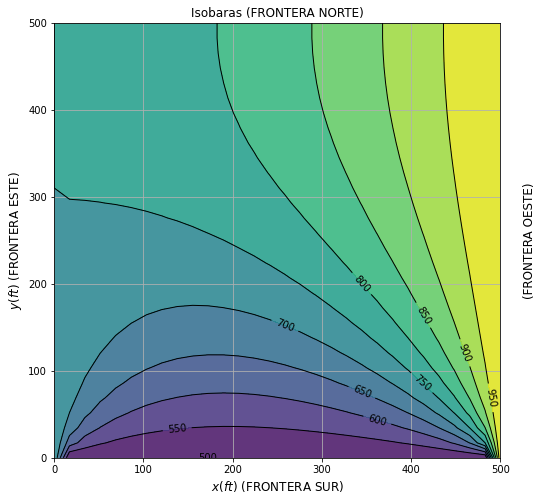

Wall time: 18.4 s


In [9]:
%%time
flujo_monofasico_2d_thomas(lx, ly, nx, ny)

### 3.1 Implementación de SciPy

La  biblioteca de scipy permite utilizar algoritmos pertenecientes al subespacio de krilov tales como: 
- gmres
- bicgstab
- gc

In [10]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import gmres
from scipy.sparse.linalg import bicgstab

In [11]:
def flujo_monofasico_2d_scipy(nx, ny, lx, ly):
    P1=750.0
    P2=500.0
    P3=1000.0
    P4=1000.0
    Press= np.zeros((nx,ny))

    #Generación de malla para graficar
    x = np.linspace(0, lx, nx)
    y = np.linspace(0, ly, ny)
    malla_x, malla_y = np.meshgrid(x, y)
    
    # se calcula el espaciamiento entre nodos
    hx = lx/(nx-1)
    hy = ly/(ny-1)
    
    # Llamar a la función para obtener los coeficientes
    AP, AW, AE, AN, AS, B = ecuaciones_discretizadas(lx, ly, nx, ny, hx, hy)

    
    #Aplicar fronteras de primera clase (Dirichlet)
    condiciones_de_frontera_dirichlet(P1, P2, P3, P4, AP, AW, AE, AN, AS, B)
    
    # Aplicar fronteras de segunda clase (Newmann)
    #condiciones_de_frontera_newmann(x, P2, P4, AP, AW, AE, AN, AS, B)
    
    n = nx*ny
    A = np.zeros((n,n))
    Press1 = np.zeros(n)
    B1 = np.zeros(n)

    for j in range (0,ny):
        for i in range (0,nx):
            k=i+nx*j     
            A[k][k] = AP[i][j]
            B1[k] = B[i][j]
        
            if j < ny-1: A[k][k+nx] = -AN[i][j]
            if i < nx-1: A[k][k+1] = -AE[i][j]
            if i > 0: A[k][k-1] = -AW[i][j]
            if j > 0: A[k][k-nx] = -AS[i][j]    
                
    A1 = lil_matrix(A)
    A1 = A1.tocsr()
    
    
    Press1 = gmres(A1, B1, tol=1.0E-07, restart = 2000)  #scipy.sparse.linalg.gmres(A, b, x0=None, tol=1e-05, restart=None, maxiter=None, xtype=None, M=None, callback=None, restrt=None)[source]¶
    #Press1 = bicgstab(A1, B1, tol=1.0E-05)  #scipy.sparse.linalg.gmres(A, b, x0=None, tol=1e-05, restart=None, maxiter=None, xtype=None, M=None, callback=None, restrt=None)[source]¶
    #Press1 = spsolve(A1, B1)  #scipy.sparse.linalg.gmres(A, b, x0=None, tol=1e-05, restart=None, maxiter=None, xtype=None, M=None, callback=None, restrt=None)[source]¶

    for j in range (0,ny):
        for i in range (0,nx):
            k=i+j*nx
            Press[i][j]=Press1[0][k]    #Cuando se utilizan los algoritmos del subespacio de Krilov el resultado es una matriz de tamaño 1 X nx*ny
            #Press[i][j]=Press1[k]    #Cuando se utiliza spsolve (descomposición LU) el resultado es un vector de tamaño 1 X nx*ny

    # graficar
    fp.graficar_isobaras_presion_y_campo_velocidad(nx, ny, hx, hy, malla_x, malla_y, Press)

In [12]:
nx, ny = 40, 40
lx, ly = 500, 500

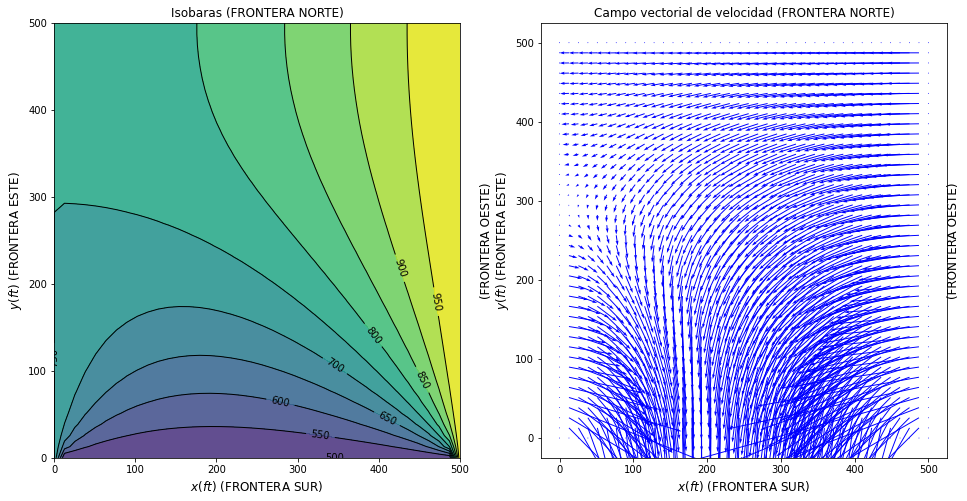

Wall time: 3.24 s


In [13]:
%%time
flujo_monofasico_2d_scipy(nx, ny, lx, ly)

In [14]:
lx, ly = 600, 600
nx, ny = 40, 40
    
def flujo_monofasico_2d_scipy_2(P1):
    #P1=750.0
    P2=500
    P3=1000.0
    P4=1000.0
    Press= np.zeros((nx,ny))

    #Generación de malla para graficar
    x = np.linspace(0, lx, nx)
    y = np.linspace(0, ly, ny)
    malla_x, malla_y = np.meshgrid(x, y)
    
    # se calcula el espaciamiento entre nodos
    hx = lx/(nx-1)
    hy = ly/(ny-1)
    
    # Llamar a la función para obtener los coeficientes
    AP, AW, AE, AN, AS, B = ecuaciones_discretizadas(lx, ly, nx, ny, hx, hy)

    
    #Aplicar fronteras de primera clase (Dirichlet)
    condiciones_de_frontera_dirichlet(P1, P2, P3, P4, AP, AW, AE, AN, AS, B)
    
    # Aplicar fronteras de segunda clase (Newmann)
    #condiciones_de_frontera_newmann(x, P2, P4, AP, AW, AE, AN, AS, B)
    
    n = nx*ny
    A = np.zeros((n,n))
    Press1 = np.zeros(n)
    B1 = np.zeros(n)

    for j in range (0,ny):
        for i in range (0,nx):
            k=i+nx*j     
            A[k][k] = AP[i][j]
            B1[k] = B[i][j]
        
            if j < ny-1: A[k][k+nx] = -AN[i][j]
            if i < nx-1: A[k][k+1] = -AE[i][j]
            if i > 0: A[k][k-1] = -AW[i][j]
            if j > 0: A[k][k-nx] = -AS[i][j]    
                
    A1 = lil_matrix(A)
    A1 = A1.tocsr()
    
    
    Press1 = gmres(A1, B1, tol=1.0E-07, restart = 2000)  #scipy.sparse.linalg.gmres(A, b, x0=None, tol=1e-05, restart=None, maxiter=None, xtype=None, M=None, callback=None, restrt=None)[source]¶
    #Press1 = bicgstab(A1, B1, tol=1.0E-05)  #scipy.sparse.linalg.gmres(A, b, x0=None, tol=1e-05, restart=None, maxiter=None, xtype=None, M=None, callback=None, restrt=None)[source]¶
    #Press1 = spsolve(A1, B1)  #scipy.sparse.linalg.gmres(A, b, x0=None, tol=1e-05, restart=None, maxiter=None, xtype=None, M=None, callback=None, restrt=None)[source]¶

    for j in range (0,ny):
        for i in range (0,nx):
            k=i+j*nx
            Press[i][j]=Press1[0][k]    #Cuando se utilizan los algoritmos del subespacio de Krilov el resultado es una matriz de tamaño 1 X nx*ny
            #Press[i][j]=Press1[k]    #Cuando se utiliza spsolve (descomposición LU) el resultado es un vector de tamaño 1 X nx*ny

    # graficar
    fp.graficar_isobaras_presion_y_campo_velocidad(nx, ny, hx, hy, malla_x, malla_y, Press)
    print("Presion cambiante: ", P1)

In [15]:
# animaciones
widgets.interact(flujo_monofasico_2d_scipy_2, P1 = widgets.Play(min=500, max=1000))

interactive(children=(Play(value=500, description='P1', max=1000, min=500), Output()), _dom_classes=('widget-i…

<function __main__.flujo_monofasico_2d_scipy_2(P1)>